<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Unrecognized location 'uppper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


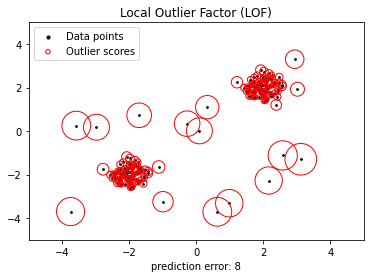

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers=0.3*np.random.randn(100,2)
X_inliers=np.r_[X_inliers+2,X_inliers-2]
X_outliers=np.random.uniform(low=-4,high=4,size=(20,2))
X=np.r_[X_inliers,X_outliers]
n_outliers=len(X_outliers)
ground_truth=np.ones(len(X),dtype=int)
ground_truth[-n_outliers:]=-1

clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)
y_pred=clf.fit_predict(X)
n_errors=(y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:,0],X[:,1],color='k',s=3.,label='Data points')
radius=(X_scores.max()-X_scores)/(X_scores.max()-X_scores.min())
plt.scatter(X[:,0],X[:,1],s=1000*radius,edgecolors='r',facecolors='none',label='Outlier scores')
plt.axis('tight')
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.xlabel("prediction error: %d" %(n_errors))
legend=plt.legend(loc='uppper left')
legend.legendHandles[0]._sizes=[10]
legend.legendHandles[1]._sizes=[20]
plt.show()